References
----------
[1] https://openstax.org/books/calculus-volume-1/pages/3-6-the-chain-rule
    
[2] Checkpoint 3.41
$$
\begin{equation}
y=cos(x^3)
\end{equation}
$$

SymPy version: 1.13.2
NumPy version: 1.26.4
Matplotlib version: 3.9.2

Lambda(x, cos(x**3))
x:[-5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5
  2.   2.5  3.   3.5  4.   4.5  5. ]
y:[0.787714512144234, -0.999823039871452, 0.391857230429550, 0.447080828542949, -0.292138808733836, -0.996560521564670, -0.145500033808614, -0.972883945979446, 0.540302305868140, 0.992197667229329, 1, 0.992197667229329, 0.540302305868140, -0.972883945979446, -0.145500033808614, -0.996560521564670, -0.292138808733836, 0.447080828542949, 0.391857230429550, -0.999823039871452, 0.787714512144234]
f′(x)=-3*x**2*sin(x**3)
f′(2)=-11.8722989594806
y_tangent:[82.9605926825554 77.0244432028152 71.0882937230749 65.1521442433346
 59.2159947635943 53.2798452838540 47.3436958041137 41.4075463243734
 35.4713968446331 29.5352473648928 23.5990978851525 17.6629484054123
 11.7267989256720 5.79064944593168 -0.145500033808614 -6.08164951354890
 -12.0177989932892 -17.9539484730295 -23.8900979527698 -29.826247

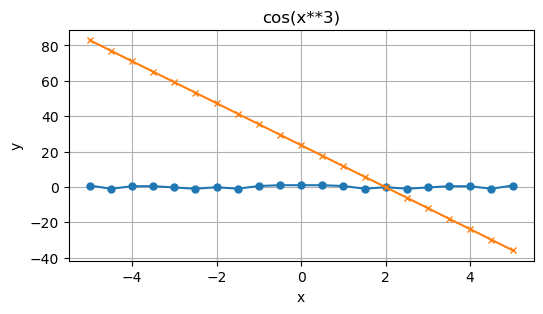

In [9]:
import sympy as sp
from sympy.abc import x
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

print(f"SymPy version: {sp.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print()

f = sp.Lambda(x, sp.cos(x ** 3))
print(f)

x_values = np.linspace(-5, 5, 21)
print(f"x:{x_values}")


def map_x_values(x_value):
    result = f(x_value)
    if result == sp.zoo:
        return np.inf
    return result


y_values = list(map(map_x_values, x_values))
print(f"y:{y_values}")

f_prime = sp.diff(f(x), x)
print(f"f′(x)={f_prime}")

x_at = 2


def calculate_slope(derivative_fn, derivative_order=1):
    slope = derivative_fn.subs(x, x_at).evalf()
    apostrophe = "′" * derivative_order
    print(f"f{apostrophe}({x_at})={slope}")
    y_tangent = slope * (x_values - x_at) + f(x_at).evalf()
    print(f"y_tangent:{y_tangent}")
    return slope, y_tangent


slope, y_tangent = calculate_slope(f_prime, 1)

figure, axes = plt.subplots(figsize=(6, 3))
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_title(f.expr)
axes.grid()
axes.plot(x_values, y_values, marker="o", markersize=5, label="f′")
axes.plot(x_values, y_tangent, marker="x", markersize=5, label="f′′")
plt.show()